In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Data Cleaning and Exploration

In [91]:
df = pd.read_csv("nearest-earth-objects(1910-2024).csv")
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [92]:
df.shape

(338199, 9)

In [93]:
df.isnull().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [94]:
df.isna().sum()* 100 / len(df)

neo_id                    0.000000
name                      0.000000
absolute_magnitude        0.008279
estimated_diameter_min    0.008279
estimated_diameter_max    0.008279
orbiting_body             0.000000
relative_velocity         0.000000
miss_distance             0.000000
is_hazardous              0.000000
dtype: float64

In [95]:
df.isnull().any(axis=1).sum()

28

In [96]:
df_cleaned = df.dropna()

In [97]:
df_cleaned.shape

(338171, 9)

In [98]:
df_cleaned.isnull().sum()

neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

In [99]:
df_cleaned.duplicated().sum()

0

In [100]:
df_cleaned.dtypes

neo_id                      int64
name                       object
absolute_magnitude        float64
estimated_diameter_min    float64
estimated_diameter_max    float64
orbiting_body              object
relative_velocity         float64
miss_distance             float64
is_hazardous                 bool
dtype: object

# EDA ##

## plotting a correlation matrix to show how the data look like

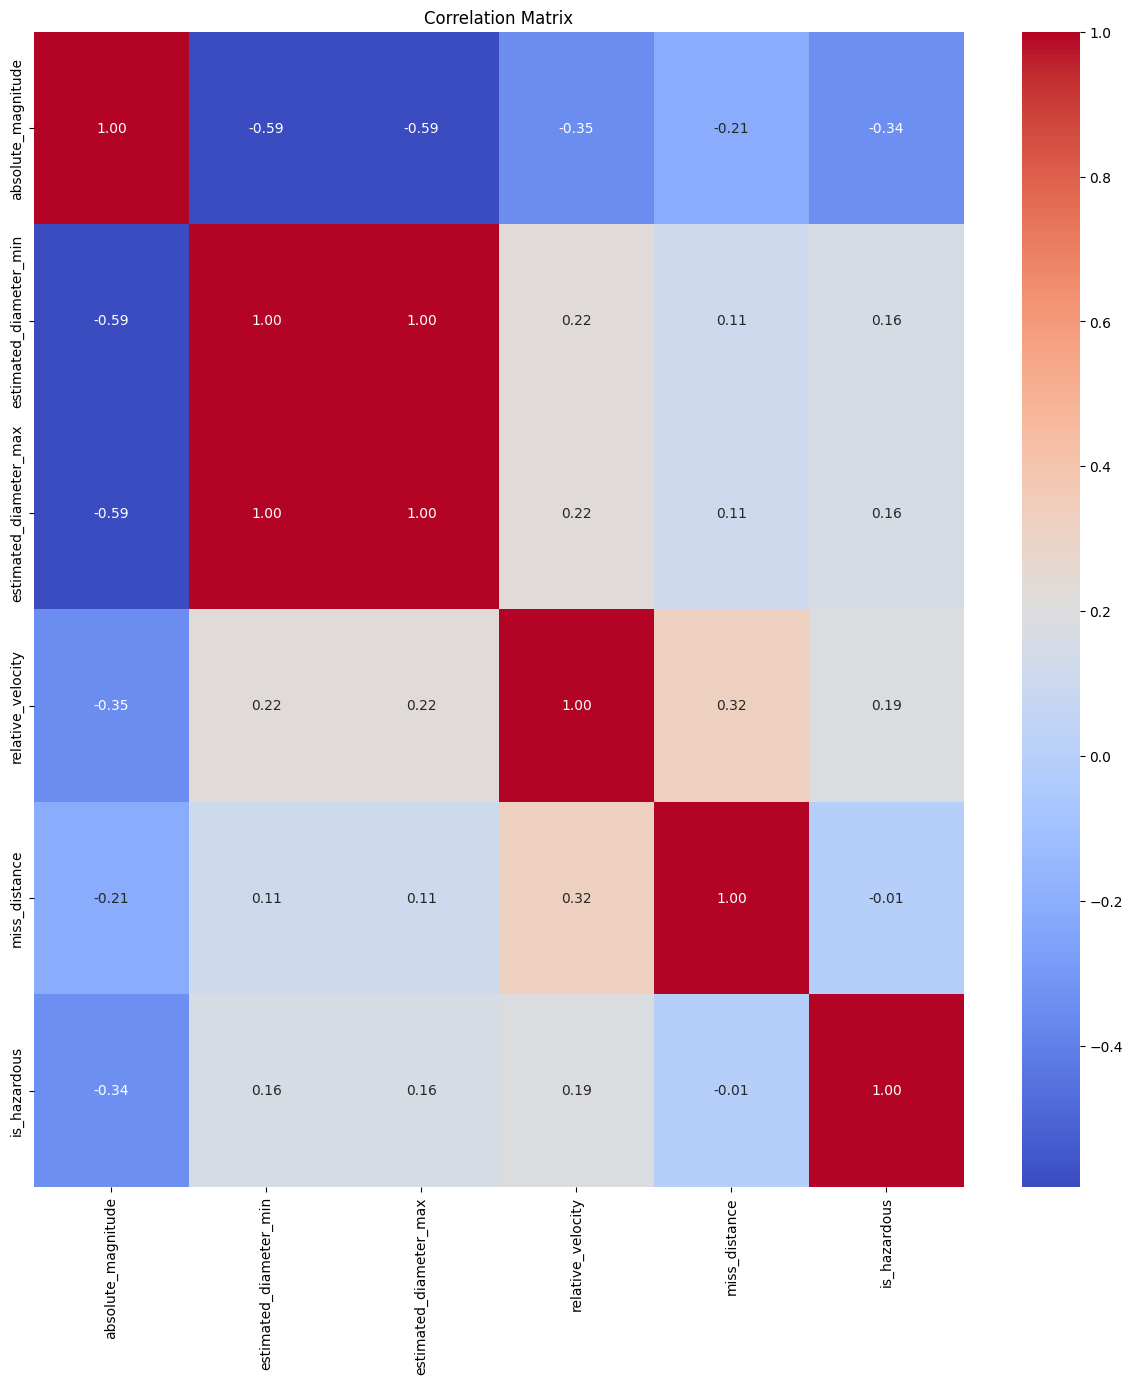

In [102]:
correlation_matrix = df_cleaned[["absolute_magnitude","estimated_diameter_min","estimated_diameter_max","relative_velocity","miss_distance","is_hazardous"]].corr()
#plotting a correlation matrix to show how the data look like
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Data Preprocessing ##

## Feature Selection

In [105]:
df_cleaned=df_cleaned.drop(columns=['neo_id','name','orbiting_body'])


In [106]:
df_cleaned.shape

(338171, 6)

In [107]:
df_cleaned["is_hazardous"].value_counts()

is_hazardous
False    295009
True      43162
Name: count, dtype: int64

In [108]:
df_cleaned["is_hazardous"].value_counts() * 100 / len(df)

is_hazardous
False    87.229412
True     12.762309
Name: count, dtype: float64

## Target Encoding

In [110]:
#I preferred to encode the target values into zeros and ones
df_cleaned["is_hazardous"] =df_cleaned["is_hazardous"].astype(int) 

In [111]:
df_cleaned["is_hazardous"].unique()


array([0, 1])

In [112]:
from sklearn.preprocessing import MinMaxScaler
df_cleaned[["absolute_magnitude","estimated_diameter_min","estimated_diameter_max","relative_velocity","miss_distance"]]= MinMaxScaler().fit_transform(df_cleaned[["absolute_magnitude","estimated_diameter_min","estimated_diameter_max","relative_velocity","miss_distance"]])

In [113]:
df_cleaned.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,0.406494,0.010506,0.010506,0.245362,0.777315,0
1,0.380189,0.014112,0.014112,0.376388,0.745994,1
2,0.501439,0.003617,0.003617,0.084582,0.898495,0
3,0.467735,0.005283,0.005283,0.269865,0.406323,0
4,0.552815,0.002028,0.002028,0.191486,0.843833,0


## Split Data

In [116]:
from sklearn.model_selection import train_test_split
# First split: train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_cleaned.drop('is_hazardous', axis=1), df_cleaned['is_hazardous'], test_size=0.2, random_state=42)

# Second split: train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

## Balance Training Data

In [118]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Original", X_train.shape, y_train.shape)
print("After balance", X_train_resampled.shape, y_train_resampled.shape)

Original (202902, 5) (202902,)
After balance (353732, 5) (353732,)


# Model Training and Evaluation ##

In [213]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [214]:
model = Sequential()

In [215]:
model = Sequential()
model.add(Dense(512, activation='relu',input_shape=(5,))) 
model.add(Dense(256, activation='relu')) 
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

In [216]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [217]:
model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                     │ (None, 512)                 │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 175,617 (686.00 KB)

 Trainable params: 175,617 (686.00 KB)

 Non-trainable params: 0 (0.00 B)

In [218]:
X_train.shape[1]

5

## Train Model

In [219]:
hist_dense = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
6341/6341 ━━━━━━━━━━━━━━━━━━━━ 54s 8ms/step - accuracy: 0.8784 - loss: 0.2758 - val_accuracy: 0.8842 - val_loss: 0.2412
Epoch 2/50
6341/6341 ━━━━━━━━━━━━━━━━━━━━ 75s 7ms/step - accuracy: 0.8827 - loss: 0.2495 - val_accuracy: 0.8843 - val_loss: 0.2550
Epoch 3/50
6341/6341 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - accuracy: 0.8816 - loss: 0.2504 - val_accuracy: 0.8839 - val_loss: 0.2399
Epoch 4/50
6341/6341 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - accuracy: 0.8828 - loss: 0.2470 - val_accuracy: 0.8849 - val_loss: 0.2402
Epoch 5/50
6341/6341 ━━━━━━━━━━━━━━━━━━━━ 43s 7ms/step - accuracy: 0.8836 - loss: 0.2451 - val_accuracy: 0.8835 - val_loss: 0.2433
Epoch 6/50
6341/6341 ━━━━━━━━━━━━━━━━━━━━ 51s 8ms/step - accuracy: 0.8831 - loss: 0.2454 - val_accuracy: 0.8848 - val_loss: 0.2402
Epoch 7/50
6341/6341 ━━━━━━━━━━━━━━━━━━━━ 46s 7ms/step - accuracy: 0.8830 - loss: 0.2459 - val_accuracy: 0.8848 - val_loss: 0.2419
Epoch 8/50
6341/6341 ━━━━━━━━━━━━━━━━━━━━ 46s 7ms/step - accuracy: 0.8843 - loss: 0

## Model Performance

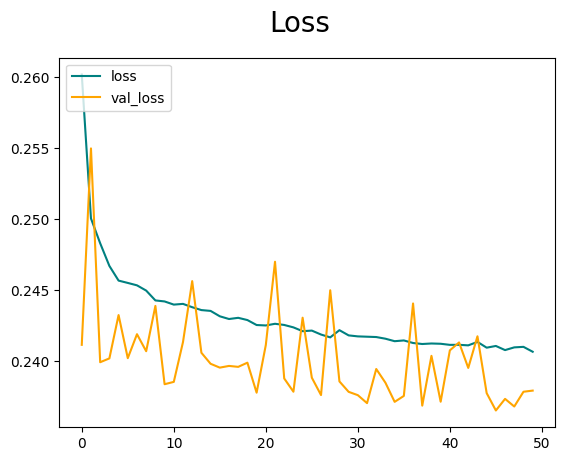

In [220]:
fig = plt.figure()
plt.plot(hist_dense.history['loss'], color='teal', label='loss')
plt.plot(hist_dense.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

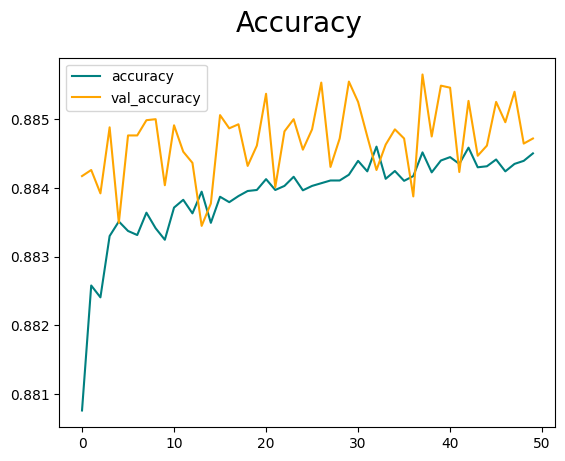

In [221]:
fig = plt.figure()
plt.plot(hist_dense.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist_dense.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate


In [222]:
from sklearn.metrics import  accuracy_score, precision_score, recall_score

In [223]:
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.5).astype(int)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")

2114/2114 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step
Precision: 0.6751
Recall: 0.1814
Accuracy: 0.8855
